In [ ]:
!git clone https://github.com/DmitryUlyanov/deep-image-prior
!mv deep-image-prior ./

Cloning into 'deep-image-prior'...
remote: Enumerating objects: 289, done.
remote: Total 289 (delta 0), reused 0 (delta 0), pack-reused 289 (from 1)
Receiving objects: 100% (289/289), 24.28 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (155/155), done.
mv: 'deep-image-prior' and './deep-image-prior' are the same file


In [ ]:
!cd deep-image-prior/

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
import torch
import torch.optim

# Check if the deep-image-prior directory exists before cloning
if not os.path.exists('deep-image-prior'):
    !git clone https://github.com/DmitryUlyanov/deep-image-prior
    # The git clone command creates the directory, so no need to move it

# Add the cloned repository and its utils directory to the system path
current_dir = os.getcwd()
# Add the main directory and the utils directory
sys.path.append(os.path.join(current_dir, 'deep-image-prior'))
sys.path.append(os.path.join(current_dir, 'deep-image-prior', 'utils'))


# Import compare_psnr from skimage.metrics (newer versions)
try:
    from skimage.metrics import peak_signal_noise_ratio as compare_psnr
except ImportError:
    # Fallback to older versions if the above fails
    from skimage.measure import compare_psnr


# Import common_utils and denoising_utils explicitly
# Since deep-image-prior/utils is in sys.path, we can import directly

# Modify denoising_utils.py to use absolute import for common_utils
!cd deep-image-prior/utils
!sed -i 's/from \.common_utils import/from common_utils import/' denoising_utils.py
!cd ../..

from deep.utils.common_utils import *
from deep.utils.denoising_utils import *


from deep.models import *


torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True
sigma = 25
sigma_ = sigma/255.

sed: can't read denoising_utils.py: No such file or directory


2.18.0
Num GPUs Available:  1
Loading image from: rgb4_noise_gt.png
Image loaded successfully. Shape: (256, 256, 3)


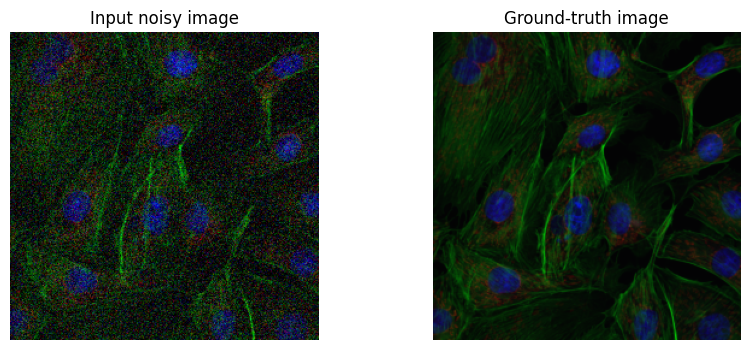

Model Architecture:


Model: "deep_image_prior"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_1_depth_0 │ (None, 128, 128,  │      3,584 │ input_layer_8[0]… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv_down_1_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_192     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_2_depth_0 │ (None, 128, 128,  │    147,584 │ leaky_re_lu_192[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv_down_2_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_193     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_1_depth_1 │ (None, 64, 64,    │    147,584 │ leaky_re_lu_193[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv_down_1_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_195     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_2_depth_1 │ (None, 64, 64,    │    147,584 │ leaky_re_lu_195[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv_down_2_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_196     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_1_depth_2 │ (None, 32, 32,    │    147,584 │ leaky_re_lu_196[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv_down_1_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_198     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_2_depth_2 │ (None, 32, 32,    │    147,584 │ leaky_re_lu_198[

 Total params: 2,183,507 (8.33 MB)

 Trainable params: 2,178,355 (8.31 MB)

 Non-trainable params: 5,152 (20.12 KB)

None
Starting Deep Image Prior training...


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


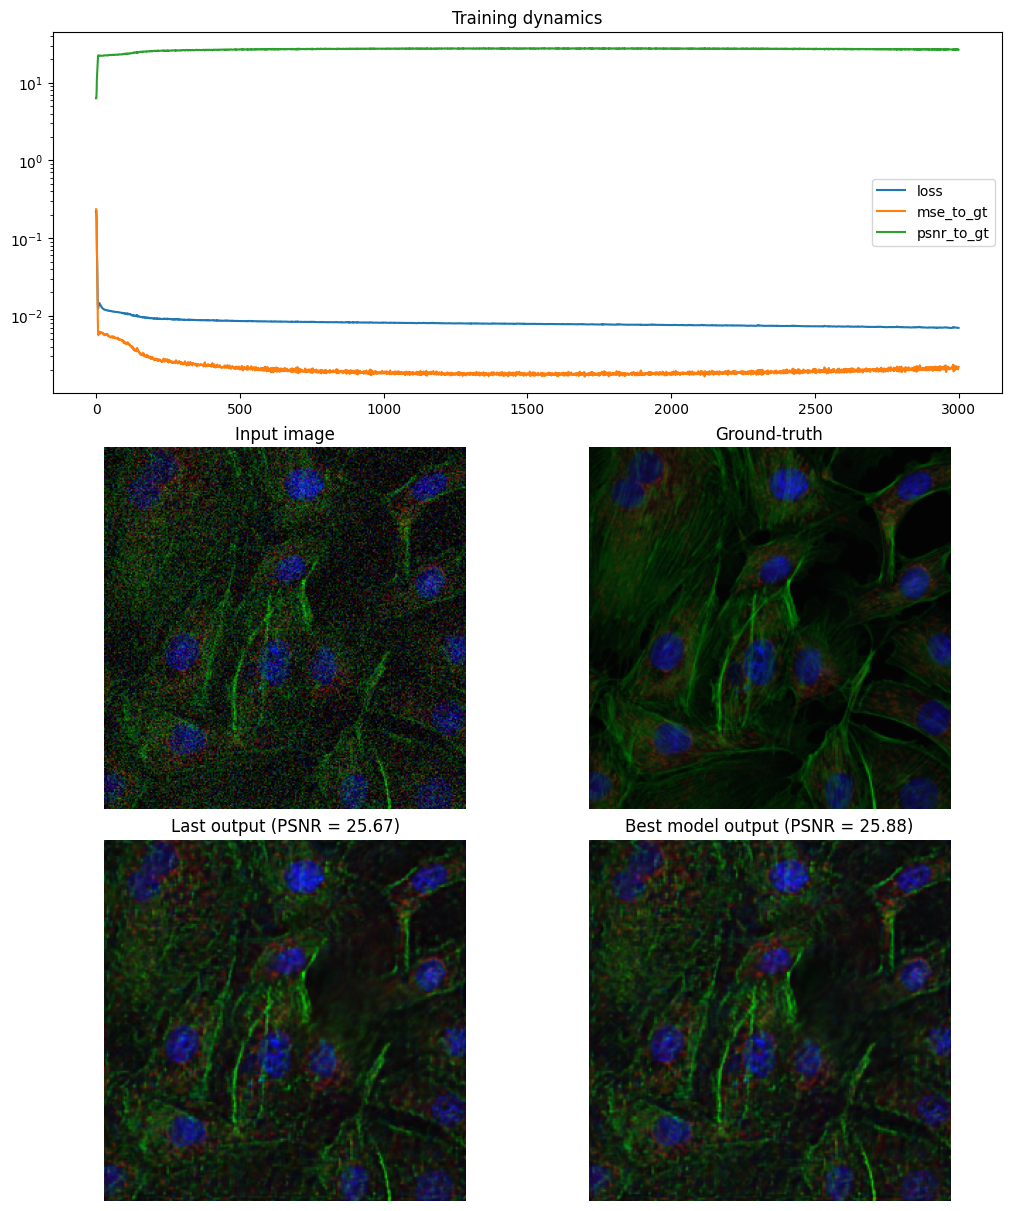

Training complete!


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 24 18:00:48 2022
Modified to accept uploaded images

@author: Morteza
"""

import os
import numpy as np
from skimage.transform import rescale, resize
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tqdm.keras import TqdmCallback
print(tf.__version__)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


def load_and_preprocess_image(image_path, target_size=(256, 256)):
    """Load and preprocess uploaded image"""
    try:
        # Load image using PIL to handle various formats
        img = Image.open(image_path)

        # Convert to RGB if needed (handles RGBA, grayscale, etc.)
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert to numpy array and normalize to [0, 1]
        img_array = np.array(img).astype(np.float32) / 255.0

        # Resize if target_size is specified
        if target_size:
            img_array = resize(img_array, target_size + (3,), anti_aliasing=True)

        return img_array
    except Exception as e:
        print(f"Error loading image: {e}")
        return None


def get_noisy_img(img, sig=30):
    """Task 1: Removing white noise"""
    sigma = sig / 255.
    noise = np.random.normal(scale=sigma, size=img.shape)
    img_noisy = np.clip(img + noise, 0, 1).astype(np.float32)
    return img_noisy


def dip_workflow(x0,
                 x_true,
                 f,
                 f_input_shape,
                 z_std=0.1,
                 loss_mask=None,
                 num_iters=1,
                 init_lr=0.01,
                 save_filepath=None):
    """Deep Image prior workflow
    Args:
        * x0: input image
        * x_true: Ground-truth image, only used for metrics comparison
        * f: Neural network to use as a prior
        * f_input_shape: Shape (excluding batch size) of inputs to f
        * loss_mask: if not None, a binary mask with the same shape as x0,
            which is applied to both x and x0 before applying the loss.
            Used for instance in the inpainting task.
        * num_iters: Number of training iterations
        * init_lr: Initial learning rate for Adam optimizer
        * If True, will save the best model in the given filepath
    """
    # Sample input z
    shape = (1,) + f_input_shape
    z = tf.constant(np.random.uniform(size=shape).astype(np.float32) * z_std, name='net_input')

    # Training Loss
    def loss_fn(x_true, x):
        del x_true
        nonlocal x0, loss_mask
        if loss_mask is None:
            return tf.reduce_mean(tf.square(x - x0))
        else:
            return tf.reduce_mean(tf.square((x - x0) * loss_mask))

    # Output/log information
    # Diff between generated image and true ground-truth
    # as mean squared error and psnr (peak signal to noise ratio)
    def mse_to_gt(x_true, x):
        return tf.reduce_mean(tf.square(x - x_true))

    def psnr_to_gt(x_true, x, maxv=1.):
        mse = tf.reduce_mean(tf.square(x - x_true))
        # Use tf.math.log for logarithmic calculation
        psnr_ = 10. * tf.math.log(maxv** 2 / mse) / tf.math.log(10.)
        return psnr_

    # Optimization
    opt = tf.keras.optimizers.Adam(learning_rate=init_lr)
    f.compile(optimizer=opt, loss=loss_fn, metrics=[mse_to_gt, psnr_to_gt])
    # Saving best model
    callbacks = ()
    if save_filepath is not None:
        callbacks = create_saving_callback(save_filepath)

    # Training
    history = f.fit(z,
                    x_true[None, ...],
                    epochs=num_iters,
                    steps_per_epoch=1,
                    verbose=0,
                    callbacks=callbacks+(TqdmCallback(verbose=1),))

    # Display results with gridspec
    # Pass training=False to predict to disable training-specific layers like GaussianNoise
    x = f.predict(z)[0]
    fig = plt.figure(figsize=(10, 12), constrained_layout=True)
    gs = fig.add_gridspec(3, 2)
    axes = [fig.add_subplot(gs[0, :]),
            fig.add_subplot(gs[1, 0]),
            fig.add_subplot(gs[1, 1]),
            fig.add_subplot(gs[2, 0]),
            fig.add_subplot(gs[2, 1])]
    for ax in axes[1:]:
        ax.set_axis_off()

    for key in history.history.keys():
        axes[0].plot(range(num_iters), history.history[key], label=key)
    axes[0].set_yscale('log')
    axes[0].legend()
    axes[0].set_title("Training dynamics")
    axes[1].imshow(x0); axes[1].set_title('Input image')
    axes[2].imshow(x_true); axes[2].set_title('Ground-truth')
    axes[3].imshow(x); axes[3].set_title(f'Last output (PSNR = {psnr_to_gt(x_true, x):.2f})')
    if save_filepath is not None and os.path.exists(save_filepath):
        f.load_weights(save_filepath)
        # Pass training=False to predict when loading best weights
        x_opt = f.predict(z)[0]
        axes[4].imshow(x_opt); axes[4].set_axis_off()
        axes[4].set_title(f'Best model output (PSNR = {psnr_to_gt(x_true, x_opt):.2f})')
    plt.show()
    return x


class GaussianNoiseWithDecay(tf.keras.layers.GaussianNoise):

    def __init__(self, stddev, decayrate=0.99999, decaysteps=1, **kwargs):
        super(GaussianNoiseWithDecay, self).__init__(stddev, **kwargs)
        self.num_calls = 0
        self.decayrate = decayrate
        self.decaysteps = decaysteps


    def call(self, inputs, training=None):
        # In modern Keras, handle training-specific logic using the training argument directly.
        if training:
            self.num_calls += 1
            stddev = self.stddev * self.decayrate ** (self.num_calls // self.decaysteps)
            return inputs + tf.keras.backend.random_normal(
                shape=tf.shape(inputs),
                mean=0.,
                stddev=stddev,
                dtype=inputs.dtype)
        else:
            # During inference, don't apply noise
            return inputs


def create_saving_callback(filepath):
    return (tf.keras.callbacks.ModelCheckpoint(
        filepath=filepath,
        monitor='loss',
        verbose=0,
        save_best_only=True,
        mode='min'),)


def deep_image_prior(input_shape,
                     noise_reg=None,
                     layers=(128, 128, 128, 128, 128),
                     kernel_size_down=3,
                     kernel_size_up=3,
                     skip=(0, 4, 4, 4, 4)):
    def norm_and_active(x):
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.LeakyReLU()(x)
        return x

    model = tf.keras.models.Sequential(name="Deep Image Prior")
    inputs = tf.keras.Input(shape=input_shape)

    ## Inputs
    x = inputs
    if noise_reg is not None:
        x = GaussianNoiseWithDecay(**noise_reg)(x)

    ## Downsampling layers
    down_layers = []
    for i, (num_filters, do_skip) in enumerate(zip(layers, skip)):
        if do_skip > 0:
            down_layers.append(norm_and_active(tf.keras.layers.Conv2D(
                filters=do_skip, kernel_size=1, strides=1, name=f"conv_skip_depth_{i}")(x)))
        for j, strides in enumerate([2, 1]):
            x = norm_and_active(tf.keras.layers.Conv2D(
                num_filters, kernel_size_down, strides=strides, padding='same',
                name=f"conv_down_{j + 1}_depth_{i}")(x))

    ## Upsampling
    for i, (num_filters, do_skip) in enumerate(zip(layers[::-1], skip[::-1])):
        x = tf.keras.layers.UpSampling2D(interpolation='bilinear', name=f"upsample_depth_{i}")(x)
        if do_skip:
            x = tf.keras.layers.Concatenate(axis=-1)([x, down_layers.pop()])
        for j, kernel_size in enumerate([kernel_size_up, 1]):
            x = norm_and_active(tf.keras.layers.Conv2D(
                num_filters, kernel_size, strides=1, padding='same',
                name=f"conv_up_{j + 1}_depth_{i}")(x))

    ## Last conv
    x = tf.keras.layers.Conv2D(filters=3, kernel_size=1, strides=1, name="conv_out")(x)
    x = tf.keras.layers.Activation('sigmoid')(x)
    return tf.keras.Model(inputs=inputs, outputs=x, name="deep_image_prior")


def display_dip_model(input_shape=(256, 256, 3)):
    model = deep_image_prior(input_shape)
    model.build(input_shape)
    print(model.summary())


def main(image_path, target_size=(256, 256), noise_level=30, num_iterations=3000):
    """Main function to run Deep Image Prior on uploaded image

    Args:
        image_path: Path to the uploaded image
        target_size: Tuple (height, width) to resize image to
        noise_level: Noise level for synthetic noise (0-255)
        num_iterations: Number of training iterations
    """

    # Load and preprocess the uploaded image
    print(f"Loading image from: {image_path}")
    x_true = load_and_preprocess_image(image_path, target_size)

    if x_true is None:
        print("Failed to load image. Please check the file path and format.")
        return

    print(f"Image loaded successfully. Shape: {x_true.shape}")

    # Add noise to create the input image
    x0 = get_noisy_img(x_true, sig=noise_level)

    # Display input and ground truth
    _, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(x0); axes[0].set_axis_off()
    axes[0].set_title("Input noisy image")
    axes[1].imshow(x_true); axes[1].set_axis_off()
    axes[1].set_title("Ground-truth image")
    plt.show()

    # Display model architecture
    print("Model Architecture:")
    display_dip_model(x_true.shape)

    # Setup model parameters
    input_shape = x0.shape
    noise_reg = {'stddev': 1./ 30., 'decayrate': 1.0, 'decaysteps': 100}

    # Create and train model
    model = deep_image_prior(input_shape, noise_reg=noise_reg)

    print("Starting Deep Image Prior training...")
    x_result = dip_workflow(x0, x_true, model, input_shape,
                           num_iters=num_iterations,
                           save_filepath='best_dip_denoising.keras')

    print("Training complete!")
    return x_result


# Example usage:
if __name__ == "__main__":
    # Replace 'your_image.jpg' with the path to your uploaded image
    image_path = "rgb4_noise_gt.png"  # Change this to your image path

    # Check if image exists
    if os.path.exists(image_path):
        result = main(image_path,
                     target_size=(256, 256),
                     noise_level=30,
                     num_iterations=3000)
    else:
        print(f"Image not found at: {image_path}")
        print("Please update the image_path variable with the correct path to your image.")

        # Alternative: List available images in current directory
        print("\nAvailable image files in current directory:")
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
        for file in os.listdir('.'):
            if any(file.lower().endswith(ext) for ext in image_extensions):
                print(f"  - {file}")

2.18.0
Num GPUs Available:  1
Loading noisy image from: rgb4_noise.png
Image loaded successfully. Shape: (256, 256, 3)


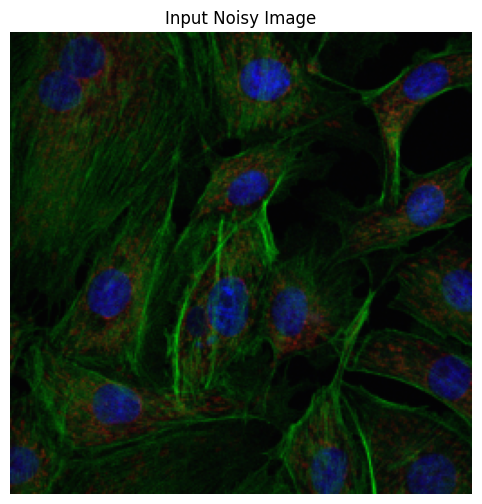


Model Architecture:


Model: "deep_image_prior"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_1_depth_0 │ (None, 128, 128,  │      3,584 │ input_layer[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        512 │ conv_down_1_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_2_depth_0 │ (None, 128, 128,  │    147,584 │ leaky_re_lu[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv_down_2_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_1_depth_1 │ (None, 64, 64,    │    147,584 │ leaky_re_lu_1[0]… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv_down_1_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_2_depth_1 │ (None, 64, 64,    │    147,584 │ leaky_re_lu_3[0]… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv_down_2_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_1_depth_2 │ (None, 32, 32,    │    147,584 │ leaky_re_lu_4[0]… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv_down_1_dept… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_down_2_depth_2 │ (None, 32, 32,    │    147,584 │ leaky_re_lu_6[0]

 Total params: 2,183,507 (8.33 MB)

 Trainable params: 2,178,355 (8.31 MB)

 Non-trainable params: 5,152 (20.12 KB)

None

Starting Deep Image Prior denoising for 3000 iterations...


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

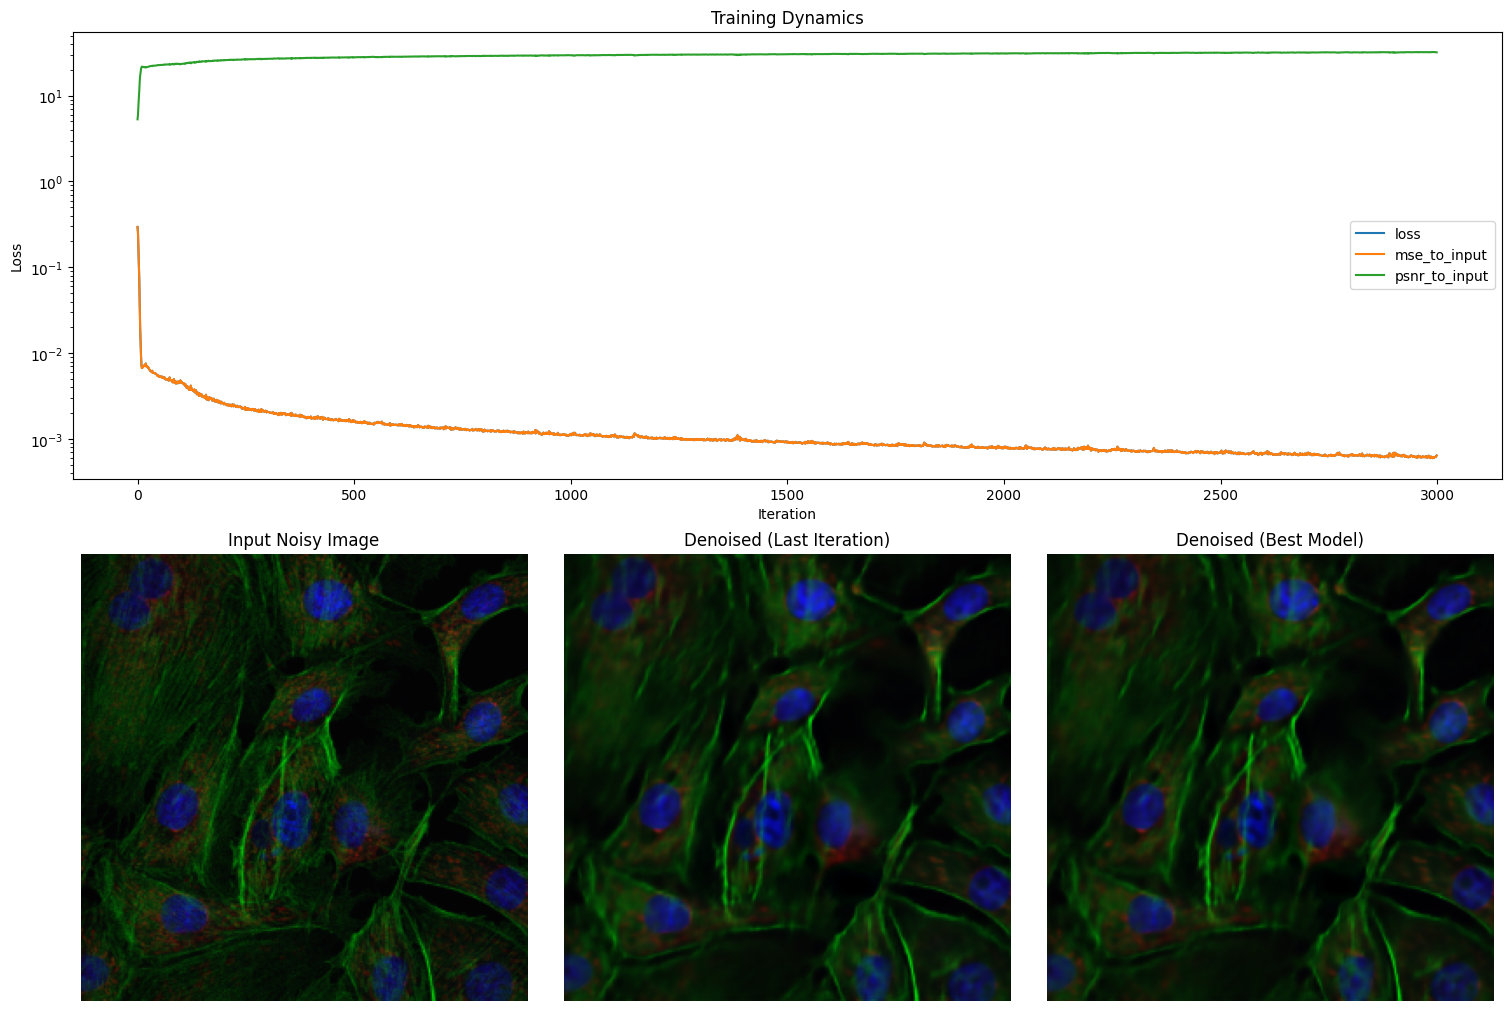

Denoising complete!
Denoised image saved as: denoised_result.png


In [1]:
# -*- coding: utf-8 -*-
"""
Deep Image Prior for Denoising - Modified for existing noisy images
Based on: https://github.com/DmitryUlyanov/deep-image-prior

@author: Modified from Morteza's implementation
"""

import os
import numpy as np
from skimage.transform import resize
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tqdm.keras import TqdmCallback
print(tf.__version__)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


def load_and_preprocess_image(image_path, target_size=(256, 256)):
    """Load and preprocess uploaded image"""
    try:
        # Load image using PIL to handle various formats
        img = Image.open(image_path)

        # Convert to RGB if needed (handles RGBA, grayscale, etc.)
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert to numpy array and normalize to [0, 1]
        img_array = np.array(img).astype(np.float32) / 255.0

        # Resize if target_size is specified
        if target_size:
            img_array = resize(img_array, target_size + (3,), anti_aliasing=True)

        return img_array
    except Exception as e:
        print(f"Error loading image: {e}")
        return None


def dip_workflow_denoising(x_noisy,
                          f,
                          f_input_shape,
                          z_std=0.1,
                          num_iters=3000,
                          init_lr=0.01,
                          save_filepath=None):
    """Deep Image prior workflow for denoising
    Args:
        * x_noisy: noisy input image to denoise
        * f: Neural network to use as a prior
        * f_input_shape: Shape (excluding batch size) of inputs to f
        * num_iters: Number of training iterations
        * init_lr: Initial learning rate for Adam optimizer
        * save_filepath: If provided, will save the best model
    """
    # Sample input z - random noise input to the network
    shape = (1,) + f_input_shape
    z = tf.constant(np.random.uniform(size=shape).astype(np.float32) * z_std, name='net_input')

    # Training Loss - fit the network output to the noisy image
    def loss_fn(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_pred - x_noisy))

    # Metrics for monitoring (we don't have ground truth, so these are just for the noisy image)
    def mse_to_input(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_pred - x_noisy))

    def psnr_to_input(y_true, y_pred, maxv=1.):
        mse = tf.reduce_mean(tf.square(y_pred - x_noisy))
        psnr_ = 10. * tf.math.log(maxv**2 / mse) / tf.math.log(10.)
        return psnr_

    # Optimization
    opt = tf.keras.optimizers.Adam(learning_rate=init_lr)
    f.compile(optimizer=opt, loss=loss_fn, metrics=[mse_to_input, psnr_to_input])

    # Saving best model
    callbacks = []
    if save_filepath is not None:
        callbacks = [tf.keras.callbacks.ModelCheckpoint(
            filepath=save_filepath,
            monitor='loss',
            verbose=0,
            save_best_only=True,
            mode='min')]

    # Training - we use the noisy image as both input and target
    # The network learns to reproduce the noisy image, but the implicit bias
    # of the network architecture acts as a regularizer
    history = f.fit(z,
                    x_noisy[None, ...],  # Add batch dimension
                    epochs=num_iters,
                    steps_per_epoch=1,
                    verbose=0,
                    callbacks=callbacks + [TqdmCallback(verbose=1)])

    # Get final result
    x_denoised = f.predict(z, verbose=0)[0]

    # Display results
    fig = plt.figure(figsize=(15, 10), constrained_layout=True)
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])

    # Training curves
    ax_loss = fig.add_subplot(gs[0, :])
    for key in history.history.keys():
        ax_loss.plot(range(num_iters), history.history[key], label=key)
    ax_loss.set_yscale('log')
    ax_loss.legend()
    ax_loss.set_title("Training Dynamics")
    ax_loss.set_xlabel("Iteration")
    ax_loss.set_ylabel("Loss")

    # Images
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[1, 2])

    ax1.imshow(np.clip(x_noisy, 0, 1))
    ax1.set_title('Input Noisy Image')
    ax1.axis('off')

    ax2.imshow(np.clip(x_denoised, 0, 1))
    ax2.set_title('Denoised (Last Iteration)')
    ax2.axis('off')

    # Load and show best model if saved
    if save_filepath is not None and os.path.exists(save_filepath):
        f.load_weights(save_filepath)
        x_best = f.predict(z, verbose=0)[0]
        ax3.imshow(np.clip(x_best, 0, 1))
        ax3.set_title('Denoised (Best Model)')
        ax3.axis('off')
        plt.show()
        return x_best
    else:
        ax3.axis('off')
        plt.show()
        return x_denoised


class GaussianNoiseWithDecay(tf.keras.layers.GaussianNoise):
    """Gaussian noise layer with exponential decay"""

    def __init__(self, stddev, decayrate=0.99999, decaysteps=1, **kwargs):
        super(GaussianNoiseWithDecay, self).__init__(stddev, **kwargs)
        self.num_calls = 0
        self.decayrate = decayrate
        self.decaysteps = decaysteps

    def call(self, inputs, training=None):
        if training:
            self.num_calls += 1
            stddev = self.stddev * self.decayrate ** (self.num_calls // self.decaysteps)
            return inputs + tf.keras.backend.random_normal(
                shape=tf.shape(inputs),
                mean=0.,
                stddev=stddev,
                dtype=inputs.dtype)
        else:
            return inputs


def deep_image_prior(input_shape,
                     noise_reg=None,
                     layers=(128, 128, 128, 128, 128),
                     kernel_size_down=3,
                     kernel_size_up=3,
                     skip=(0, 4, 4, 4, 4)):
    """
    Deep Image Prior U-Net architecture

    Args:
        input_shape: Shape of input noise tensor
        noise_reg: Dictionary with noise regularization parameters
        layers: Number of filters in each layer
        kernel_size_down: Kernel size for downsampling
        kernel_size_up: Kernel size for upsampling
        skip: Skip connection channels for each layer
    """
    def norm_and_active(x):
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.LeakyReLU()(x)
        return x

    inputs = tf.keras.Input(shape=input_shape)
    x = inputs

    # Add noise regularization if specified
    if noise_reg is not None:
        x = GaussianNoiseWithDecay(**noise_reg)(x)

    # Downsampling path
    down_layers = []
    for i, (num_filters, do_skip) in enumerate(zip(layers, skip)):
        # Skip connection preparation
        if do_skip > 0:
            skip_layer = tf.keras.layers.Conv2D(
                filters=do_skip, kernel_size=1, strides=1,
                name=f"conv_skip_depth_{i}")(x)
            down_layers.append(norm_and_active(skip_layer))

        # Downsampling convolutions
        for j, strides in enumerate([2, 1]):
            x = tf.keras.layers.Conv2D(
                num_filters, kernel_size_down, strides=strides, padding='same',
                name=f"conv_down_{j + 1}_depth_{i}")(x)
            x = norm_and_active(x)

    # Upsampling path
    for i, (num_filters, do_skip) in enumerate(zip(layers[::-1], skip[::-1])):
        # Upsample
        x = tf.keras.layers.UpSampling2D(
            interpolation='bilinear', name=f"upsample_depth_{i}")(x)

        # Add skip connection
        if do_skip:
            x = tf.keras.layers.Concatenate(axis=-1)([x, down_layers.pop()])

        # Upsampling convolutions
        for j, kernel_size in enumerate([kernel_size_up, 1]):
            x = tf.keras.layers.Conv2D(
                num_filters, kernel_size, strides=1, padding='same',
                name=f"conv_up_{j + 1}_depth_{i}")(x)
            x = norm_and_active(x)

    # Output layer
    x = tf.keras.layers.Conv2D(filters=3, kernel_size=1, strides=1, name="conv_out")(x)
    x = tf.keras.layers.Activation('sigmoid')(x)

    return tf.keras.Model(inputs=inputs, outputs=x, name="deep_image_prior")


def display_model_info(input_shape=(256, 256, 3)):
    """Display model architecture information"""
    model = deep_image_prior(input_shape)
    print(model.summary())
    return model


def denoise_image(noisy_image_path,
                  target_size=(256, 256),
                  num_iterations=3000,
                  learning_rate=0.01,
                  save_model=True):
    """
    Main function to denoise an image using Deep Image Prior

    Args:
        noisy_image_path: Path to the noisy image
        target_size: Resize image to this size
        num_iterations: Number of training iterations
        learning_rate: Learning rate for optimization
        save_model: Whether to save the best model
    """

    # Load the noisy image
    print(f"Loading noisy image from: {noisy_image_path}")
    x_noisy = load_and_preprocess_image(noisy_image_path, target_size)

    if x_noisy is None:
        print("Failed to load image. Please check the file path and format.")
        return None

    print(f"Image loaded successfully. Shape: {x_noisy.shape}")

    # Display the input image
    plt.figure(figsize=(8, 6))
    plt.imshow(np.clip(x_noisy, 0, 1))
    plt.title("Input Noisy Image")
    plt.axis('off')
    plt.show()

    # Display model architecture
    print("\nModel Architecture:")
    model = display_model_info(x_noisy.shape)

    # Setup noise regularization (helps with overfitting)
    noise_reg = {
        'stddev': 1./30.,
        'decayrate': 0.99999,
        'decaysteps': 1
    }

    # Create the model
    model = deep_image_prior(x_noisy.shape, noise_reg=noise_reg)

    # Set up save path
    save_filepath = 'best_dip_denoising.keras' if save_model else None

    print(f"\nStarting Deep Image Prior denoising for {num_iterations} iterations...")

    # Run the denoising
    result = dip_workflow_denoising(
        x_noisy,
        model,
        x_noisy.shape,
        num_iters=num_iterations,
        init_lr=learning_rate,
        save_filepath=save_filepath
    )

    print("Denoising complete!")

    # Save the result
    result_path = 'denoised_result.png'
    result_uint8 = (np.clip(result, 0, 1) * 255).astype(np.uint8)
    Image.fromarray(result_uint8).save(result_path)
    print(f"Denoised image saved as: {result_path}")

    return result


# Example usage
if __name__ == "__main__":
    # Configuration
    NOISY_IMAGE_PATH = "rgb4_noise.png"  # Replace with your image path
    TARGET_SIZE = (256, 256)  # Resize to this size (or None to keep original)
    NUM_ITERATIONS = 3000  # More iterations = better quality but slower
    LEARNING_RATE = 0.01

    # Check if image exists
    if os.path.exists(NOISY_IMAGE_PATH):
        result = denoise_image(
            noisy_image_path=NOISY_IMAGE_PATH,
            target_size=TARGET_SIZE,
            num_iterations=NUM_ITERATIONS,
            learning_rate=LEARNING_RATE,
            save_model=True
        )
    else:
        print(f"Image not found at: {NOISY_IMAGE_PATH}")
        print("Please update NOISY_IMAGE_PATH with the correct path to your noisy image.")

        # List available images
        print("\nAvailable image files in current directory:")
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
        for file in os.listdir('.'):
            if any(file.lower().endswith(ext) for ext in image_extensions):
                print(f"  - {file}")

# Additional utility functions

def compare_images(original_path, denoised_path):
    """Compare original noisy and denoised images side by side"""
    original = load_and_preprocess_image(original_path)
    denoised = load_and_preprocess_image(denoised_path)

    if original is not None and denoised is not None:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(np.clip(original, 0, 1))
        axes[0].set_title("Original Noisy Image")
        axes[0].axis('off')

        axes[1].imshow(np.clip(denoised, 0, 1))
        axes[1].set_title("Denoised Image")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()


def batch_denoise(image_folder, output_folder, **kwargs):
    """Denoise multiple images in a folder"""
    os.makedirs(output_folder, exist_ok=True)

    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    image_files = [f for f in os.listdir(image_folder)
                   if any(f.lower().endswith(ext) for ext in image_extensions)]

    for image_file in image_files:
        print(f"\nProcessing: {image_file}")
        input_path = os.path.join(image_folder, image_file)

        result = denoise_image(input_path, **kwargs)

        if result is not None:
            output_filename = f"denoised_{image_file}"
            output_path = os.path.join(output_folder, output_filename)
            result_uint8 = (np.clip(result, 0, 1) * 255).astype(np.uint8)
            Image.fromarray(result_uint8).save(output_path)
            print(f"Saved: {output_path}")